In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor

In [2]:
X_train_label = pd.read_csv('./data/X_train_label.csv')
X_test_label = pd.read_csv('./data/X_test_label.csv')
Y_train = pd.read_csv('./data/Y_train.csv')
Y_test = pd.read_csv('./data/Y_test.csv')
arr_delay_only_y_train = pd.read_csv('./data/arr_delay_only_y_train.csv')
arr_delay_only_y_test = pd.read_csv('./data/arr_delay_only_y_test.csv')

Y_train = Y_train[["DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_SECURITY", "DELAY_DUE_NAS", "DELAY_DUE_LATE_AIRCRAFT"]]
Y_test = Y_test[["DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_SECURITY", "DELAY_DUE_NAS", "DELAY_DUE_LATE_AIRCRAFT"]]

# For overall arrival delay

### Linear Regressison model

In [3]:
model = LinearRegression()
model.fit(X_train_label, arr_delay_only_y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 16.12349460729074


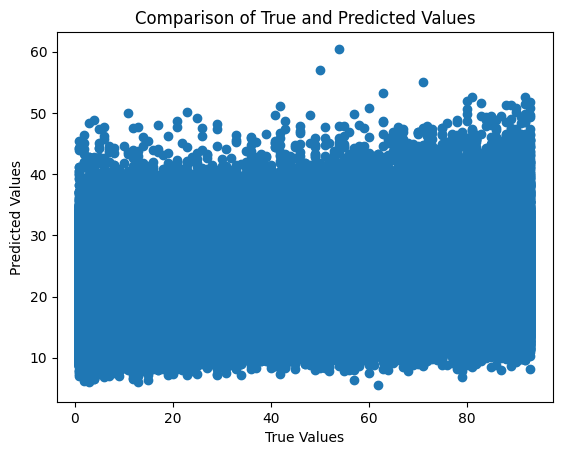

In [4]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Decision Tree Regressor

In [5]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
tree_model.fit(X_train_label, arr_delay_only_y_train)

# Make predictions on the testing set
y_pred = tree_model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 15.52884879267603


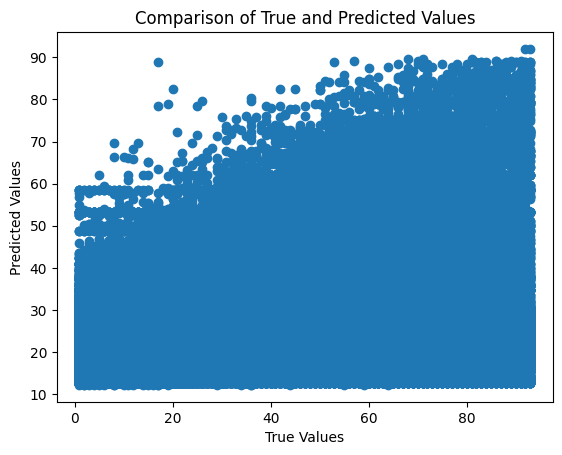

In [6]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()


### Random Forest Regressor

In [7]:
# Train the Random Forest regressor with custom depth and other parameters
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train_label, arr_delay_only_y_train.values.ravel())  # ravel() to convert column vector to 1d array

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 15.468517877989571


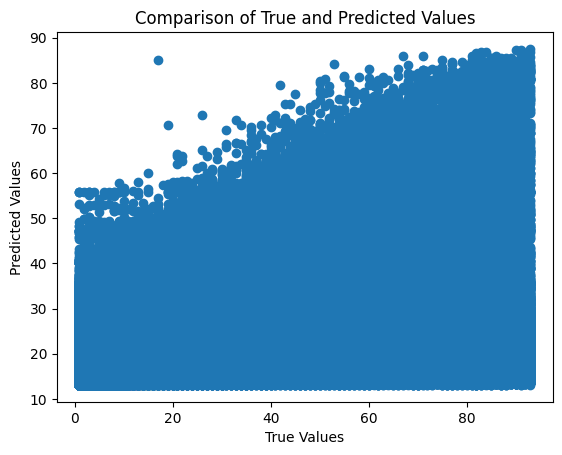

In [8]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

# For individual delay components

In [9]:
mask = Y_train.notna().all(axis=1)

X_train_label = X_train_label.loc[mask]
Y_train = Y_train.loc[mask]

mask = Y_test.notna().all(axis=1)

X_test_label = X_test_label.loc[mask]
Y_test = Y_test.loc[mask]

### Linear Regression




In [10]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 14.33395329209118
DELAY_DUE_WEATHER: 2.805473879799608
DELAY_DUE_SECURITY: 0.28601552511591094
DELAY_DUE_NAS: 7.589573600068071
DELAY_DUE_LATE_AIRCRAFT: 14.050086486225624


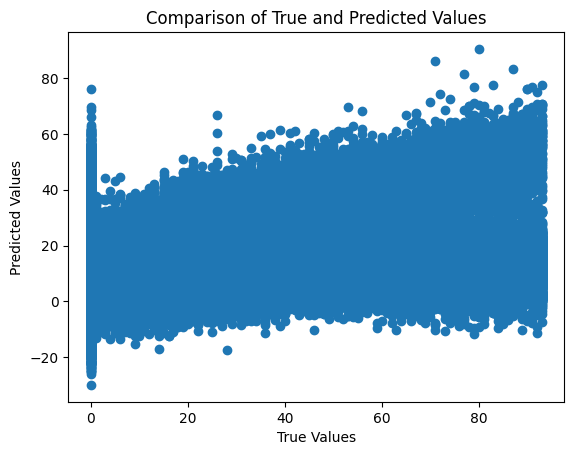

In [11]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Decision Tree Regressor

In [12]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)  # Example: max_depth=10, min_samples_leaf=5
tree_model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = tree_model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 13.552766779880963
DELAY_DUE_WEATHER: 2.775540681532422
DELAY_DUE_SECURITY: 0.28027584752821566
DELAY_DUE_NAS: 7.0244526081176755
DELAY_DUE_LATE_AIRCRAFT: 13.425722648816274


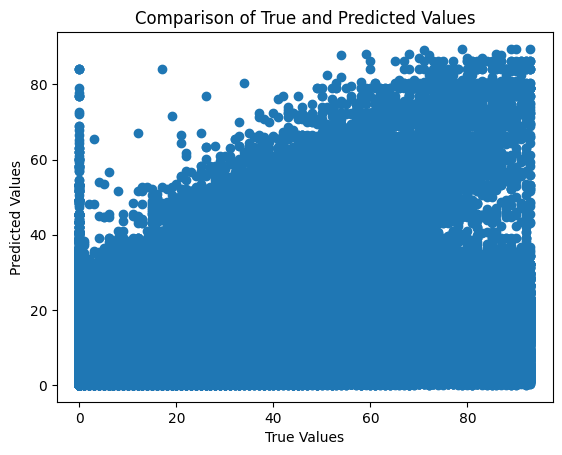

In [13]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Random Forest Regressor

In [14]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = rf_model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 13.493035891096344
DELAY_DUE_WEATHER: 2.7741231204428978
DELAY_DUE_SECURITY: 0.28022249311876096
DELAY_DUE_NAS: 6.951042556670441
DELAY_DUE_LATE_AIRCRAFT: 13.3880232250208


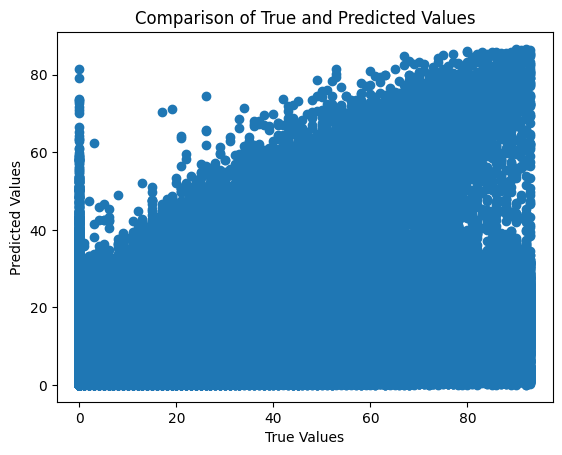

In [15]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Neural Network

In [ ]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_label.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5)  # Number of output neurons should match the number of columns in Y
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_label, Y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test_label, Y_test)
print("Test Mean Absolute Error:", mae)

# Make predictions
Y_pred = model.predict(X_test_label)

# Calculate Mean Absolute Error for each column
mae_columns = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error for each column:")
print(mae_columns)
pd.DataFrame(history.history).to_csv("./models/results/NN_test_aug.csv")

c:\Users\ebror\OneDrive\Documents\GitHub\Project\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
43257/43257 ━━━━━━━━━━━━━━━━━━━━ 43s 966us/step - loss: 259.1451 - mae: 8.9346 - val_loss: 190.4792 - val_mae: 7.6735
Epoch 2/50
43257/43257 ━━━━━━━━━━━━━━━━━━━━ 41s 955us/step - loss: 188.0794 - mae: 7.7625 - val_loss: 187.8768 - val_mae: 7.6887
Epoch 3/50
43206/43257 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 187.0355 - mae: 7.7204

### XGBoost Regressor

In [ ]:
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_label, Y_train)

Y_test_pred = xgb_regressor.predict(X_test_label)
Y_train_pred = xgb_regressor.predict(X_train_label)

test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)

print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")

Train Mean Absolute Error: 9.101083755493164
Test Mean Absolute Error: 9.149923324584961
Train Mean Squared Error: 318.5647888183594
Test Mean Squared Error: 322.20892333984375


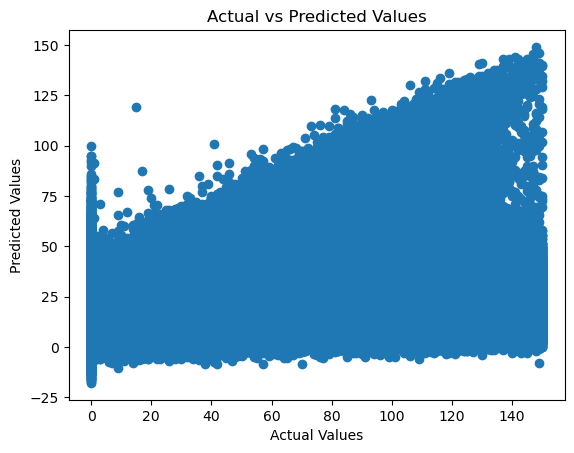

In [ ]:
plt.scatter(Y_train, Y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

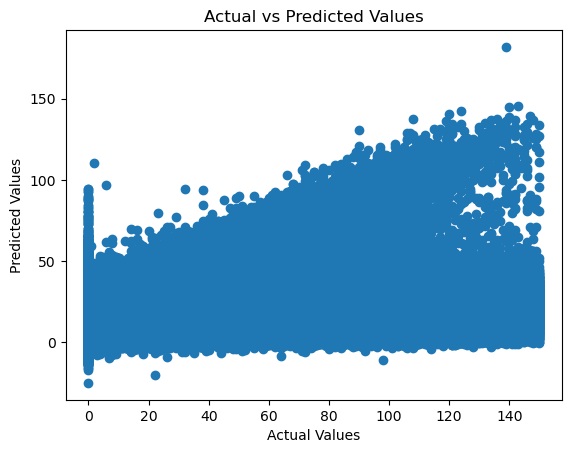

In [ ]:
plt.scatter(Y_test, Y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()